### This project targets on Mall Customer Segmentation
### Tasks of the project  
* EDA and Visualization of variables 
* KMeans to build clusters
* Use Decision Tree to find splitting rule to clusters

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os

In [ ]:
os.getcwd()

In [5]:
# import dataset
Raw=pd.read_csv('~/Documents/Kaggle/Mall_Customers.csv')

In [7]:
# data check
Raw.head(5)
Raw.info()
Raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Based on the basic info on the dataset, there are 5 columns in the dataset, 4 of them are numeric and 1 is categorical 
## EDA and visualization of the dataset 
* Count and bar chart of Gender
* Age, Income, SS distribution
* Pairplot and correlation of numeric variables

In [9]:
Raw['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Count by Gender')

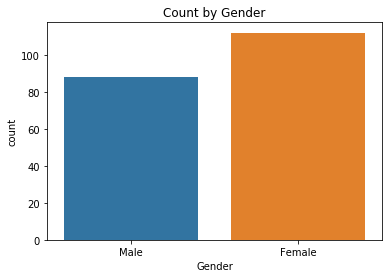

In [73]:
sns.countplot(x='Gender',data=Raw)
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Count by Gender')

In [17]:
# distribution of Age 
Raw['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

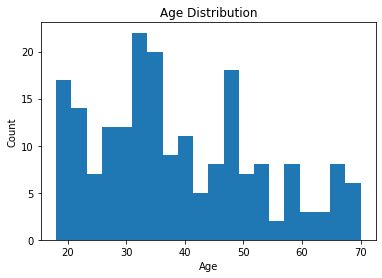

In [19]:
plt.hist(Raw['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

In [20]:
# distribution of Income
Raw['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

Text(0.5, 1.0, 'Income Distribution')

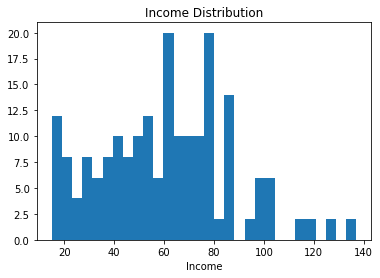

In [21]:
plt.hist(Raw['Annual Income (k$)'],bins=30)
plt.xlabel('Income')
plt.title('Income Distribution')

In [22]:
Raw['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

Text(0.5, 1.0, 'Spending Score Distribution')

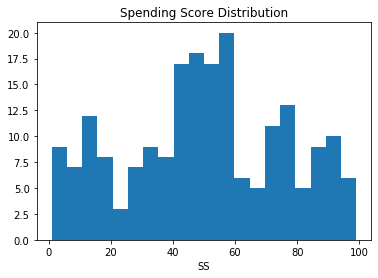

In [23]:
plt.hist(Raw['Spending Score (1-100)'],bins=20)
plt.xlabel('SS')
plt.title('Spending Score Distribution')

Text(0.5, 1, 'PairPlot')

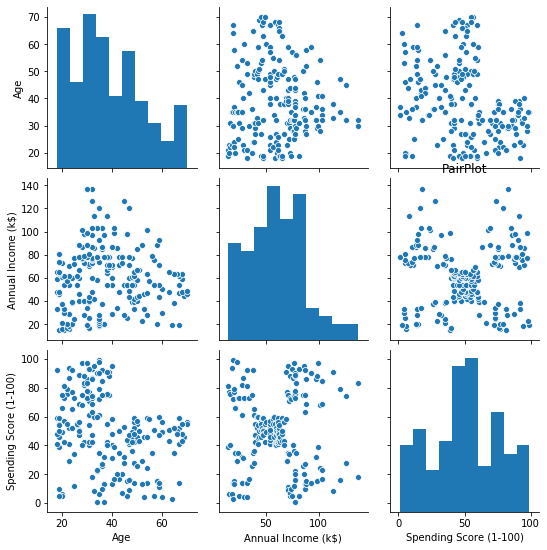

In [27]:
# Numeric variable correlation
sns.pairplot(Raw[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [29]:
#correlation matrix
Raw[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


## Using KMeans for clustering, using Elbow method to determine optimal number of clusters
* Using Age and Income
* Using Income and SS
* Using Age and SS 
* Decision tree to apply on clusters

### Age and Income KMeans

In [30]:
#Age and Income
AI= Raw[['Age','Annual Income (k$)','CustomerID']]

In [31]:
# Initialize Inertia for AI
inertia_AI=[]
for k in range(1,11):
    kmeans=KMeans(k,max_iter=300,random_state=123)
    kmeans.fit(AI[['Age','Annual Income (k$)']])
    inertia_AI.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow plot using Age and Income')

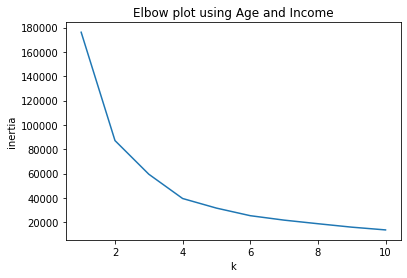

In [34]:
plt.plot(np.arange(1 , 11) , inertia_AI)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow plot using Age and Income')

In [37]:
AI_KM4=KMeans(4,max_iter=300,random_state=123)
AI_KM4.fit(Raw[['Age','Annual Income (k$)']])
AI_KM4.cluster_centers_

array([[ 30.34693878,  29.26530612],
       [ 39.        , 106.5       ],
       [ 55.81481481,  51.77777778],
       [ 31.95890411,  72.95890411]])

Text(0.5, 1.0, 'Clustering of 4 Age_Income')

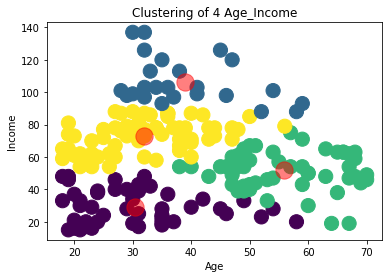

In [38]:
plt.scatter( x = 'Age' ,y = 'Annual Income (k$)' , data =Raw , c = AI_KM4.labels_ , 
            s = 200 )
plt.scatter(x = AI_KM4.cluster_centers_[: , 0] , y =  AI_KM4.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering of 4 Age_Income')

### Spending Score and Income KMeans

In [40]:
#SpendingScore and Income
SSI= Raw[['Spending Score (1-100)','Annual Income (k$)','CustomerID']]

In [41]:
inertia_SSI=[]
for k in range(1,11):
    kmeans_SSI=KMeans(k,max_iter=300,random_state=123)
    kmeans_SSI.fit(Raw[['Spending Score (1-100)','Annual Income (k$)']])
    inertia_SSI.append(kmeans_SSI.inertia_)

Text(0.5, 1.0, 'Elbow plot using SS and Income')

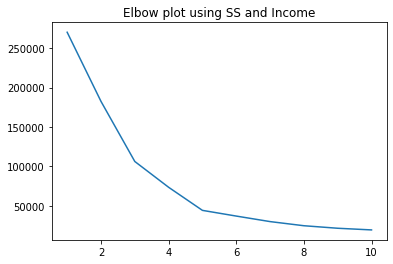

In [42]:
plt.plot(range(1,11),inertia_SSI)
plt.title('Elbow plot using SS and Income')

In [45]:
#determine the optimal cluster using elbow k=
SSI_Kmeans=KMeans(5,max_iter=300,random_state=123)
SSI_Kmeans.fit(Raw[['Spending Score (1-100)','Annual Income (k$)']])
SSI_Kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

Text(0.5, 1.0, 'Clustering of 4 using SS and Income')

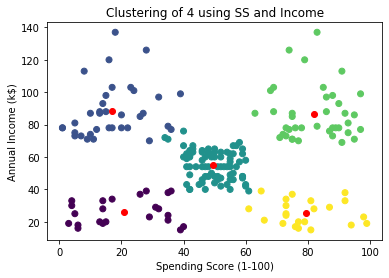

In [46]:
# Ploting the clusters
plt.scatter(x='Spending Score (1-100)',y='Annual Income (k$)',data=SSI,c=SSI_Kmeans.labels_)
plt.scatter(x=SSI_Kmeans.cluster_centers_[:,0],y=SSI_Kmeans.cluster_centers_[:,1],c='red')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Clustering of 4 using SS and Income')

### Age and Spending Score KMeans

In [49]:
ASS=Raw[['Age','Spending Score (1-100)']]

In [50]:
inertia_ASS=[]
for k in range(1,11):
    Kmeans_ASS=KMeans(k,max_iter=300,random_state=123)
    Kmeans_ASS.fit(Raw[['Age','Spending Score (1-100)']])
    inertia_ASS.append(Kmeans_ASS.inertia_)

Text(0.5, 1.0, 'Elbow plot using Age and SS')

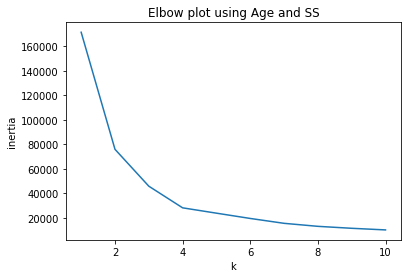

In [51]:
# Elbow Plot
plt.plot(range(1,11),inertia_ASS)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow plot using Age and SS')

In [52]:
# base on the graphics above, 4 should be the optimal cluster
ASS_KM4=KMeans(4,max_iter=300,random_state=123)
ASS_KM4.fit(Raw[['Age','Spending Score (1-100)']])
ASS_KM4.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

Text(0.5, 1.0, 'Clustering of 4 using Age and SS')

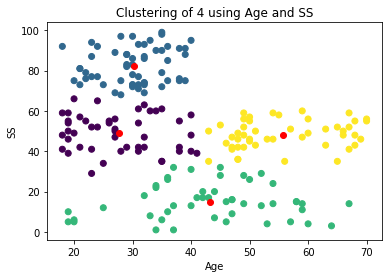

In [53]:
plt.scatter(x='Age',y='Spending Score (1-100)',data=ASS,c=ASS_KM4.labels_)
plt.scatter(x=ASS_KM4.cluster_centers_[:,0],y=ASS_KM4.cluster_centers_[:,1],c='red')
plt.xlabel('Age')
plt.ylabel('SS')
plt.title('Clustering of 4 using Age and SS')

In [54]:
ASS['Cluster_Label']=ASS_KM4.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
ASS.head()

,Age,Spending Score (1-100),Cluster_Label
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


In [56]:
ASS['Cluster_Label'].value_counts()

1    57
3    48
2    48
0    47
Name: Cluster_Label, dtype: int64

In [61]:
#Decision Tree for splitting rules on label
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [59]:
DT=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=30)
DT.fit(ASS[['Age','Spending Score (1-100)']],ASS['Cluster_Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(200.88000000000002, 285.39000000000004, 'Spending Score (1-100) <= 67.0\nentropy = 1.995\nsamples = 200\nvalue = [47, 57, 48, 48]\nclass = 1'),
 Text(133.92000000000002, 203.85000000000002, 'Spending Score (1-100) <= 33.0\nentropy = 1.585\nsamples = 143\nvalue = [47, 0, 48, 48]\nclass = 2'),
 Text(66.96000000000001, 122.31, 'entropy = 0.144\nsamples = 49\nvalue = [1, 0, 48, 0]\nclass = 2'),
 Text(200.88000000000002, 122.31, 'Age <= 42.0\nentropy = 1.0\nsamples = 94\nvalue = [46, 0, 0, 48]\nclass = 3'),
 Text(133.92000000000002, 40.76999999999998, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0, 0, 0]\nclass = 0'),
 Text(267.84000000000003, 40.76999999999998, 'entropy = 0.0\nsamples = 48\nvalue = [0, 0, 0, 48]\nclass = 3'),
 Text(267.84000000000003, 203.85000000000002, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57, 0, 0]\nclass = 1')]

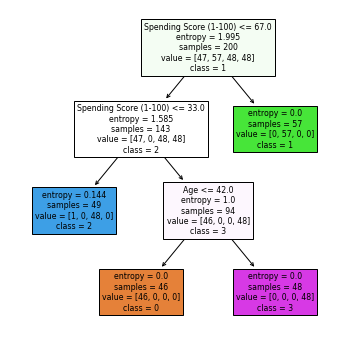

In [71]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
tree.plot_tree(DT,filled=True,feature_names=ASS[['Age','Spending Score (1-100)']].columns,class_names=['0','1','2','3'])